# ICT235 TMA

### Student Information
- Name: B HARIPPRIYA
- PI: K2170295

### Important Notes
1. Do **NOT** import any Python modules otherwise specified. Fail to comply will result in **ZERO** mark for the question.
2. You must carefully read each question and **STRICTLY** follow the instructions. 
3. You are implementation is evaluated based on various aspects, including but not limited to:
    - Correctness and efficiency of the implementation
    - Handling of edge cases and error conditions
    - Code readability and organization
4. Make sure your class and function names correctly align with specified requirements. This is a must since a set of unit tests will be utilized to evaluate your work.
5. You may identify and implement unspecified properties and functions (e.g., private properties, functions, and any others) required to actualize the requested operations. However, do note that, **the unit tests will only exploit the classess and functions defined/provided officially**.

------

### Q1a

In [1]:
class PositionalList:
    """A doubly linked list implementation that supports positional operations."""

    class _Node:
        """A lightweight node class for doubly linked list."""
        __slots__ = '_element', '_prev', '_next'

        def __init__(self, element, prev, next):
            self._element = element
            self._prev = prev
            self._next = next

    class Position:
        """An abstraction representing the location of a single element."""
        def __init__(self, container, node):
            self._container = container
            self._node = node

        def element(self):
            """Return the element stored at this Position."""
            return self._node._element

    def __init__(self):
        """Create an empty list."""
        self._header = self._Node(None, None, None)  # Sentinel node at the start
        self._trailer = self._Node(None, self._header, None)  # Sentinel node at the end
        self._header._next = self._trailer
        self._size = 0
        
    def _validate(self, given_pos):
        """Check if the given position is valid."""
        if not isinstance(given_pos, self.Position): 
            raise TypeError("pos must be a proper Position type")
        if given_pos._container is not self:
            raise ValueError("pos does not belong to this container")
        if given_pos._node._next is None:  
            raise ValueError("pos is no longer valid")
        return given_pos._node

    def _make_position(self, node):
        """Return a Position instance for a given node (or None if sentinel)."""
        if (node is self._header) or (node is self._trailer):
            return None  
        return self.Position(self, node)
    
    def _insert_between(self, data, predecessor, successor): # A reuseable method
        """Insert a new node between two existing nodes (beside each other) and return its position."""
        node = self._Node(data, predecessor, successor)  # Create a new node with only the data
        # Manually set predecessor and successor links
        node._prev = predecessor 
        node._next = successor
        predecessor._next = node
        successor._prev = node
        self._size += 1  # Ensure size is updated
        return self._make_position(node)
    
    def first(self):
        """Return the first position in the list (or None if empty)."""
        # Make sure size of playlist is not negative
        if self._size < 0: 
            raise Exception("Negative value returned for list length") 
        # Return None if list is empty
        elif self._size == 0: 
            return None 
        else:
            return self._make_position(self._header._next) 

    def last(self):
        """Return the last position in the list (or None if empty)."""
        # Make sure size of playlist is not negative
        if self._size < 0: 
            raise Exception("Negative value returned for list length") 
        # Return None if list is empty
        elif self._size == 0: 
            return None 
        else:
            return self._make_position(self._trailer._prev)

    def before(self, p):
        """Return the position before p (or None if p is first)."""
        if self._size == 0: # Check if list is empty
            raise Exception("List is empty. Nothing to delete.")
        node = self._validate(p) #Use position to find the node
        if node._prev is self._header: # If p is first, return None
            return None
        else:
            return self._make_position(node._prev)

    def after(self, p):
        """Return the position after p (or None if p is last)."""
        if self._size == 0: # Check if list is empty
            raise Exception("List is empty. Nothing to delete.")
        node = self._validate(p) #Use position to find the node
        if node._next is self._trailer: # If p is last, return None
            return None
        else:
            return self._make_position(node._next)

    def add_first(self, e):
        """Insert element e at the front of the list and return new Position."""
        return self._insert_between(e, self._header, self._header._next) # Insert between head and head.next
        
    def add_last(self, e):
        """Insert element e at the back of the list and return new Position."""
        return self._insert_between(e, self._trailer._prev, self._trailer) # Insert between tail and tail.prev

    def add_before(self, p, e):
        """Insert element e into list before Position p and return new Position."""
        node = self._validate(p) # Use position to find the node
        return self._insert_between(e, node._prev, node) # Insert between node.prev and node

    def add_after(self, p, e):
        """Insert element e into list after Position p and return new Position."""
        node = self._validate(p) # Use position to find the node
        return self._insert_between(e, node, node._next)  # Insert between node and node.next

    def delete(self, p):
        """Remove and return the element at Position p."""
        if self._size == 0: # Check if list is empty
            raise Exception("List is empty. Nothing to delete.")
        node = self._validate(p) # Use position to find the node
        predecessor = node._prev # Get previous node
        successor = node._next # Get next node
        predecessor._next = successor # Update previous node's next pointer
        successor._prev = predecessor # Update next node's previous pointer
        self._size -= 1
        element = node._element # Get the element 
        node._prev = node._next = node._element = None  # Deprecate node
        return element
    
    def __len__(self):
        """Return the number of elements in the list."""
        return self._size

    def __iter__(self):
        """Generate a forward iteration of the elements of the list."""
        cur = self.first() # Start cursor at the first node
        while cur is not None: # Iterate through the list
            yield cur.element() # Yield  element at the current node
            cur = self.after(cur) # Move cursor to the next node

### Q1b

In [2]:
import random

class PlaylistManager:
    """A playlist manager implemented using a positional list."""

    def __init__(self):
        """Initialize an empty playlist."""
        self._playlist = PositionalList()
        self._history_stack = []

    def add_song(self, position, song):
        """
        Add a song at the given position in the playlist.
        :param position: The index at which to add the song.
        :param song: The song to add.
        """
        # Check if position given is accurate
        if (position < 0) or (position > len(self._playlist)):
            raise IndexError('Incorrect index given')
        
        if position == 0: # If song needs to be first in the playlist
            self._playlist.add_first(song) 
        elif position == len(self._playlist): # If song needs to be last in playlist
            self._playlist.add_last(song) 
        else:
            pointer = self._playlist.first() # Point to first song
            i = 0 # Establish a counter
            while i < position: # loop until reach position of song that needs to be added
                pointer = self._playlist.after(pointer) # Point to song after song where position is stated 
                i += 1 # Increment counter
            self._playlist.add_before(pointer, song) # Add song before the position stated
            

    def move_song(self, from_position, to_position):
        """
        Move a song from one position to another.
        :param from_position: The current index of the song.
        :param to_position: The new index for the song.
        """
        # Check if fom_position and to_position is accurate
        if (from_position < 0) or (from_position > len(self._playlist)) or (to_position < 0) or (to_position > len(self._playlist)):
            raise IndexError('Incorrect index given')
        
        # Check if from_position & to_position are the same. If yes, can't move
        if from_position == to_position:
            return IndexError("Current position and new position is the same. Can't perform move operation")
            return None
        
        # Remove the song from the current position so that it can be moved to the new position
        current_position_of_pointer = self._playlist.first() # Get position of pointer
        i = 0 # Establish a counter
        while i < from_position: # loop until reach position of song that needs to be moved
            current_position_of_pointer = self._playlist.after(current_position_of_pointer) # Move the pointer to the position after the song
            i += 1 # Increment counter
        song_to_be_moved = self._playlist.delete(current_position_of_pointer) #delete that song from that position 
        
        # Check which position song needs to be moved to
        if to_position == 0: # If song needs to be first in the playlist
            self._playlist.add_first(song_to_be_moved) 
        elif to_position == len(self._playlist): # If song needs to be last in playlist
            self._playlist.add_last(song_to_be_moved) 
        else:
            new_position_to_insert = self._playlist.first() #Get the position of the first song
            i = 0 # Establish a counter
            while i < to_position: # loop until reach position of song that needs to be added
                new_position_to_insert = self._playlist.after(new_position_to_insert) # Move the pointer to the position after the song 
                i += 1 # Increment counter
            self._playlist.add_before(new_position_to_insert, song_to_be_moved) # Add song before the position stated
            
        
    def remove_song(self, position):
        """
        Remove a song at the given position.
        :param position: The index of the song to remove.
        """
        # Check if position given is accurate
        if (position < 0) or (position > len(self._playlist)):
            raise IndexError('Incorrect index given as it is out of range')
        
        position_remove_song = self._playlist.first() # Get the position of the first song
        i = 0 # Establish a counter
        while i < position: # loop until reach position of song that needs to be moved
            position_remove_song = self._playlist.after(position_remove_song) # Move the pointer to the position after the song 
            i += 1 # Increment counter
        self._playlist.delete(position_remove_song) # Delete the song that is at the position

        
    def shuffle(self, seed=None):
        """
        Shuffle the playlist randomly using the given seed.
        :param seed: A seed for reproducible shuffling.
        """
        # Save the current playlist order 
        self._history_stack.append(list(self._playlist))

        # Get the list of songs
        song_list = list(self._playlist)

        # Shuffle the list
        random.seed(seed)  
        random.shuffle(song_list)

        # Add new shuffled order to list 
        self._playlist = PositionalList()  
        for song in song_list:
            self._playlist.add_last(song) 

            
    def undo_shuffle(self):
        """Undo the most recent shuffle, restoring the previous playlist order."""
        if not self._history_stack: # No shuffle order stored in order to undo
            raise Exception("Playlist was not shuffled")

        previous_shuffle_order = self._history_stack.pop() # remove the shuffled order stored in stack
        self._playlist = PositionalList() 
        for song in previous_shuffle_order: # Now the original order will be in the stack
            self._playlist.add_last(song) # Add original order to playlist

            
    def display(self):
        """Display the current playlist."""
        #Loop through the playlist and print each song title
        playlist_display = []
        for song in self._playlist: 
            playlist_display.append(song)
            
        print(playlist_display)

### Q1 Test Case

In [3]:
# Example usage

manager = PlaylistManager()

# Add songs
manager.add_song(0, "Song A")
manager.add_song(1, "Song B")
manager.add_song(2, "Song C")
manager.display()
# Output: Playlist: ['Song A', 'Song B', 'Song C']

# Shuffle the playlist
manager.shuffle(seed=42)
manager.display()
# Output: Must be different from the original (previously displayed playlist)

# Undo the shuffle
manager.undo_shuffle()
manager.display()
# Output: Playlist: ['Song A', 'Song B', 'Song C']

# Move a song
manager.move_song(2, 0)
manager.display()
# Output: Playlist: ['Song C', 'Song A', 'Song B']

# Remove a song
manager.remove_song(1)
manager.display()
# Output: Playlist: ['Song C', 'Song B']

['Song A', 'Song B', 'Song C']
['Song B', 'Song A', 'Song C']
['Song A', 'Song B', 'Song C']
['Song C', 'Song A', 'Song B']
['Song C', 'Song B']


### Q2 

In [4]:
class TreeNode:
    """Definition for a binary tree node."""
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [5]:
class Codec:
    """Codec for serializing and deserializing a binary tree."""
    
    # Q2a
    def serialize(self, root):
        """
        Encodes a tree to a single string. Use recursion.
        :type root: TreeNode
        :rtype: str
        """    
        # Create a re-usable method to perform pre-order traversal that the serialize method can call
        def serialize_preorder(node):
            string_result = [] # Create a list to store the result
            if node is None: # If node is null, append "null" to list  
                string_result.append("null")
            else: 
                string_result.append(str(node.val)) # Append node's value to list
                string_result += serialize_preorder(node.left) # Move to the next left node
                string_result += serialize_preorder(node.right) # If there are no more left nodes, move to the right node
            return string_result # Return list
        return ",".join(serialize_preorder(root)) # serialize (self, root) method will call serialize_preorder and perform a join on the list to return the results in a string format
        
    
    # Q2b
    def deserialize(self, data):
        """
        Decodes your encoded data to tree. Use recursion.
        :type data: str
        :rtype: TreeNode
        """
        string_result_data = data.split(",") # Split the string data into a list
        # Create a re-usable method to build tree from the data produced in serialize method that the deserialize method can call
        def deserialize_serialize():
            if len(string_result_data) == 0:
                return None
            else:
                value = string_result_data.pop(0) # Get the first value in the list
                if value == "null": # If value is null, return None
                    return None
                else:
                    build_tree = TreeNode(int(value)) # Create new node with its corresponding value
                    build_tree.left = deserialize_serialize() # Move to the next left node
                    build_tree.right = deserialize_serialize() # If there are no more left nodes, move to the right node
            return build_tree # Return tree
        return deserialize_serialize()
        

### Q2 Test Case

In [6]:
# Create a sample binary tree
# Example:
#       1
#      / \
#     2   3
#        / \
#       4   5

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.right.left = TreeNode(4)
root.right.right = TreeNode(5)

# Initialize Codec
codec = Codec()

# Example usage
serialized = codec.serialize(root)  # Should produce a serialized string
print(f"Serialized Tree: {serialized}")
# # Output: Serialized Tree: 1,2,null,null,3,4,null,null,5,null,null
deserialized = codec.deserialize(serialized)  # Should reconstruct the original tree
print(f"Deserialized Tree: {serialized}")
# # Output: Deserialized Tree: 1,2,null,null,3,4,null,null,5,null,null

Serialized Tree: 1,2,null,null,3,4,null,null,5,null,null
Deserialized Tree: 1,2,null,null,3,4,null,null,5,null,null


### Q3a

In [7]:
class BinaryHeap:
    """Binary Heap implementation supporting both min-heap and max-heap."""
    
    def __init__(self, is_min_heap=True):
        """
        Initialize the heap.
        :param is_min_heap: Set True for Min-Heap, False for Max-Heap
        """
        self.data = []  # List to store heap elements
        self.is_min_heap = is_min_heap

    def _compare(self, parent, child):
        """
        Helper function to compare parent and child based on heap type.
        :param parent: Parent value
        :param child: Child value
        :return: True if the parent violates the heap property, False otherwise
        """
        if self.is_min_heap: # check if it is min-heap
            return parent > child # check if it violates heap property [for min-heap, parent should be less than child]
        else:
            return parent < child # return false if it doesnt violate and it is indeed min-heap [for max-heap, parent should be greater than child]
      
            
    # Helper function to get parent 
    def _parent(self, i):
        return (i - 1) // 2
    
    # Helper function to get left child 
    def _left_child(self, i):
        return 2*i + 1
    
    # Helper function to get right child
    def _right_child(self, i):
        return 2*i + 2
    
    # Helper function to check if parent has a left child
    def _has_left_child(self, i):
        return self._left_child(i) < len(self.data) 
    
    # Helper function to check if parent has a right child
    def _has_right_child(self, i):
        return self._right_child(i) < len(self.data)
    
    # Helper function to swap elements during _bubble_up and _bubble_down methods
    def _swap_elements(self, i, j):
        self.data[i], self.data[j] = self.data[j], self.data[i]


    def push(self, value):
        """
        Insert value into the heap.
        :param value: Value to be inserted
        """
        self.data.append(value) # insert only value to heap list and not with key
        self._bubble_up(len(self.data) - 1) # bubble_up newly added position (restore heap property by moving value to front)


    def pop(self):
        """
        Remove and return the top element of the heap.
        :return: The top element of the heap
        """
        if len(self.data) == 0: # check if heap is empty
            raise Exception('Heap is empty. Nothing to remove')
        
        self._swap_elements(0, len(self.data) - 1)
        top_element = self.data.pop() # remove top element
        self._bubble_down(0) # fix new root
        return top_element 


    def heapify(self, array):
        """
        Build a heap from an unordered array.
        :param array: List of values to build the heap
        """
        if len(array) == 0:
            raise Exception('Array is empty. Nothing to heapify')
        
        self.data = array.copy() # copy array to data
        get_parent_lastleaf = self._parent(len(self.data) - 1) # get parent of last leaf
        for i in range(get_parent_lastleaf, -1, -1): #loop through array and include root
            self._bubble_down(i) # bubble down the element at index


    def _bubble_up(self, index):
        """
        Restore the heap property by bubbling up the element at index.
        :param index: Index of the element to bubble up
        """
        # check if index is an invalid index
        if index < 0 or index >= len(self.data):
            raise IndexError("Invalid index for bubble_up")
        
        parent = self._parent(index) # get parent index
        if (index > 0) and self._compare(self.data[parent], self.data[index]): # check if index is greater than 0 and if parent is greater than child
            self._swap_elements(index, parent) # swap parent and child 
            self._bubble_up(parent) # bubble up parent at index [recursion]. if its min-heap, parent < child, if its max-heap, parent > child
        

    def _bubble_down(self, index):
        """
        Restore the heap property by bubbling down the element at index.
        :param index: Index of the element to bubble down
        """
        # check if index is an invalid index
        if index < 0 or index >= len(self.data):
            raise IndexError("Invalid index for bubble_down")
        
        if self._has_left_child(index): # Check if there is left child
            left = self._left_child(index) # If there is left, get the index
            small_child = left   # Initalize small child as left -> Although right may be smaller
        
            # If I know there is a left, then I check if there is a right
            if self._has_right_child(index): # Check if there is right child
                right = self._right_child(index) # If there is a right child, get the index
            
                # If there is both left and right child -> Check which one is smaller
                if self._compare(self.data[left], self.data[right]): # If right child is smaller 
                    small_child = right # I replace small_child as the right one
        
            # Once you find the child with the smallest key, check if the child's key is smaller than parent j
            if self._compare( self.data[index], self.data[small_child]):
                self._swap_elements(index, small_child) # Swap parent j and small_child
                self._bubble_down(small_child)    # Recur at position of small child

### Q3a Test Case

In [8]:
# Example usage

# Create a min-heap
min_heap = BinaryHeap(is_min_heap=True)
min_heap.push(10)
min_heap.push(5)
min_heap.push(20)
print("Min-Heap Top:", min_heap.pop())  # Expected: 5

# Create a max-heap
max_heap = BinaryHeap(is_min_heap=False)
max_heap.push(10)
max_heap.push(5)
max_heap.push(20)
print("Max-Heap Top:", max_heap.pop())  # Expected: 20

# Build a heap using heapify
array = [10, 5, 20, 1, 15]
min_heap.heapify(array)
print("Heapified Min-Heap:", min_heap.data)  # Expected: Min-Heap order


Min-Heap Top: 5
Max-Heap Top: 20
Heapified Min-Heap: [1, 5, 20, 10, 15]


### Q3b

In [9]:
import random
import time

def measure_performance(array_sizes, is_min_heap=True):
    """
    Measure performance of heap building approaches.
    :param array_sizes: List of array sizes to test
    :param is_min_heap: Whether to test for min-heap or max-heap
    :return: Times for repeated push and heapify
    """
    # Generate random array based on aray_sizes
    random_array = []
    for _ in range(array_sizes):
        random_array.append(random.randint(1, 1000))

    # Get time taken to build heap for both min & max heap using repeated push method
    start_time = time.time() # start the clock 
    heap_push = BinaryHeap(is_min_heap) # create a heap object
    for element in random_array: # loop through array
        heap_push.push(element) # push element to heap
    end_time = time.time() # stop the clock
    push_time = end_time - start_time # get the time taken to build heap using repeated push calls

    # Get time taken to build heap for both min & max heap using heapify method
    start_time = time.time() # start the clock 
    heap_heapify = BinaryHeap(is_min_heap) # create a heap object
    heap_heapify.heapify(random_array) # build heap using heapify
    end_time = time.time() # stop the clock
    heapify_time = end_time - start_time # get the time taken to build heap using heapify
    
    print(f"Array Size: {array_sizes}, Which Heap? [True is min-heap, False is max-heap]: {is_min_heap}, Push Time: {push_time:.6f}, Heapify Time: {heapify_time:.6f}")

    if push_time < heapify_time:
        print(f"Building heaps using repeated push() calls is faster than heapify by {heapify_time - push_time:.6f} seconds")
    else:
        print(f"Building heaps using heapify() is faster than repeated push() calls by {push_time - heapify_time:.6f} seconds")

    return push_time, heapify_time


### Q3b Test Case

In [10]:
# Array sizes to test
array_sizes = [10**4, 10**5, 10**6, 10**7]

print('Min-heap Testing')
for size in array_sizes:
    measure_performance(size, is_min_heap=True) 
    print('\n')

print('\n')
print('Max-heap Testing')
for size in array_sizes:
    measure_performance(size, is_min_heap=False)
    print('\n')

Min-heap Testing
Array Size: 10000, Which Heap? [True is min-heap, False is max-heap]: True, Push Time: 0.012606, Heapify Time: 0.010434
Building heaps using heapify() is faster than repeated push() calls by 0.002172 seconds


Array Size: 100000, Which Heap? [True is min-heap, False is max-heap]: True, Push Time: 0.088952, Heapify Time: 0.087267
Building heaps using heapify() is faster than repeated push() calls by 0.001685 seconds


Array Size: 1000000, Which Heap? [True is min-heap, False is max-heap]: True, Push Time: 0.915740, Heapify Time: 0.881888
Building heaps using heapify() is faster than repeated push() calls by 0.033852 seconds


Array Size: 10000000, Which Heap? [True is min-heap, False is max-heap]: True, Push Time: 9.226217, Heapify Time: 8.990636
Building heaps using heapify() is faster than repeated push() calls by 0.235581 seconds




Max-heap Testing
Array Size: 10000, Which Heap? [True is min-heap, False is max-heap]: False, Push Time: 0.008864, Heapify Time: 0.0086

### Q3c

In [ ]:
import matplotlib.pyplot as plt

def plot_results(array_sizes, push_times, heapify_times, heap_type):
    """
    Plot the results of the performance comparison.
    :param array_sizes: List of array sizes
    :param push_times: List of times for repeated push
    :param heapify_times: List of times for heapify
    :param heap_type: "Min-Heap" or "Max-Heap"
    """
    
    plt.figure(figsize=(10, 5))
    
    plt.title(f'Performance Comparison: {heap_type}')
    plt.xlabel('Array Size')
    plt.ylabel('Time')

    plt.plot(array_sizes, push_times, label='Repeated Push Method')
    plt.plot(array_sizes, heapify_times, label='Heapify Method')
   
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()    

### Q3c Test Case

Array Size: 10000, Which Heap? [True is min-heap, False is max-heap]: True, Push Time: 0.011214, Heapify Time: 0.009510
Building heaps using heapify() is faster than repeated push() calls by 0.001704 seconds
Array Size: 10000, Which Heap? [True is min-heap, False is max-heap]: True, Push Time: 0.008684, Heapify Time: 0.008800
Building heaps using repeated push() calls is faster than heapify by 0.000116 seconds
Array Size: 100000, Which Heap? [True is min-heap, False is max-heap]: True, Push Time: 0.091234, Heapify Time: 0.088005
Building heaps using heapify() is faster than repeated push() calls by 0.003229 seconds
Array Size: 100000, Which Heap? [True is min-heap, False is max-heap]: True, Push Time: 0.090103, Heapify Time: 0.088735
Building heaps using heapify() is faster than repeated push() calls by 0.001368 seconds
Array Size: 1000000, Which Heap? [True is min-heap, False is max-heap]: True, Push Time: 0.906673, Heapify Time: 0.875557
Building heaps using heapify() is faster than 

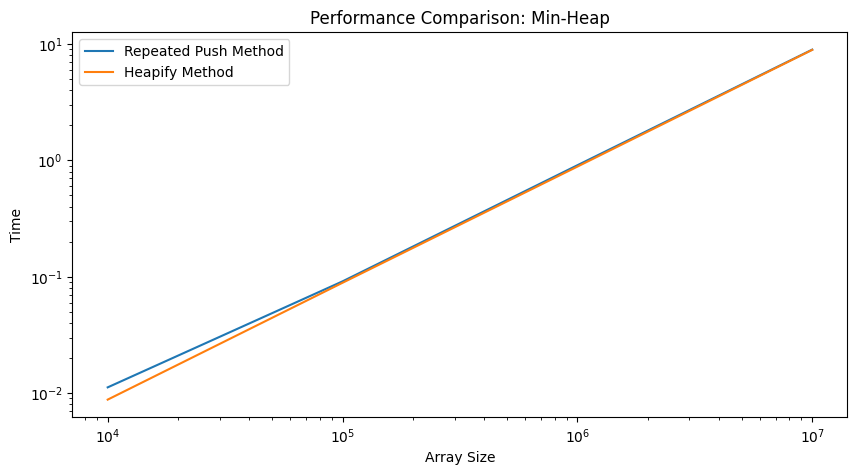

Array Size: 10000, Which Heap? [True is min-heap, False is max-heap]: False, Push Time: 0.013551, Heapify Time: 0.009324
Building heaps using heapify() is faster than repeated push() calls by 0.004227 seconds
Array Size: 10000, Which Heap? [True is min-heap, False is max-heap]: False, Push Time: 0.008868, Heapify Time: 0.009999
Building heaps using repeated push() calls is faster than heapify by 0.001131 seconds
Array Size: 100000, Which Heap? [True is min-heap, False is max-heap]: False, Push Time: 0.089457, Heapify Time: 0.088228
Building heaps using heapify() is faster than repeated push() calls by 0.001229 seconds
Array Size: 100000, Which Heap? [True is min-heap, False is max-heap]: False, Push Time: 0.089151, Heapify Time: 0.087368
Building heaps using heapify() is faster than repeated push() calls by 0.001783 seconds
Array Size: 1000000, Which Heap? [True is min-heap, False is max-heap]: False, Push Time: 0.888119, Heapify Time: 0.873474
Building heaps using heapify() is faster 

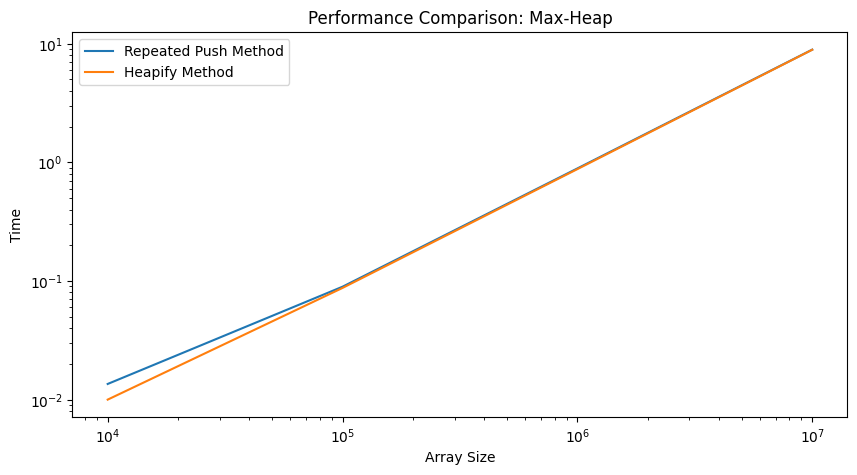

In [14]:
array_sizes = [10**4, 10**5, 10**6, 10**7]

# Test for min-heap
push_time_minheap = []
heapify_time_minheap = []
for size in array_sizes:
    push_time_minheap.append(measure_performance(size, is_min_heap=True)[0])
    heapify_time_minheap.append(measure_performance(size, is_min_heap=True)[1])

plot_results(array_sizes, push_time_minheap, heapify_time_minheap, "Min-Heap")

# Test for max-heap
push_time_maxheap = []
heapify_time_maxheap = []
for size in array_sizes:
    push_time_maxheap.append(measure_performance(size, is_min_heap=False)[0])
    heapify_time_maxheap.append(measure_performance(size, is_min_heap=False)[1])

plot_results(array_sizes, push_time_maxheap, heapify_time_maxheap, "Max-Heap")

### Q3d Answers
- Q3d (i): 
    - The expected time complexity for Heapify is O(n). This method builds the builds the heap using a bottom up approach. The bottom up approach aka bubble_down’s time complexity is O(log(n)) for height ‘h’ of the tree. The number of nodes increases depending on the height of the tree which leads to the Heapify operation being linear. 
    - The expected time complexity for repeated push calls is O(n log n) based on the ‘n’ calls made to the push function. Each push operation takes O(log n) based on the height of the tree which is log(n). Therefore, if the push function is called ‘n’ times, the time complexity will be O(n log n).  


- Q3d (ii): 
    - Heapify operations should be more efficient than repeated push calls based on its time complexity. Based on the plots above, the orange line representing Heapify operations appear to have a lower time recorded than the blue line representing the push calls but the gap between the 2 lines is not significant. It leads to the assumption that although the gap is small, time complexity for push method is roughly about the same as Heapify which isn’t right. 
    - The reason for the plots not meeting the expected outcome could be due to small array sizes. If the array sizes are small, there wouldn’t be any room to show the differences. My laptop can only handle up to 10^7 array size.